# <b>Why and how to: path planning algorithm ? BFS, A\* and RRT</b>

## HIGHLIGHTS

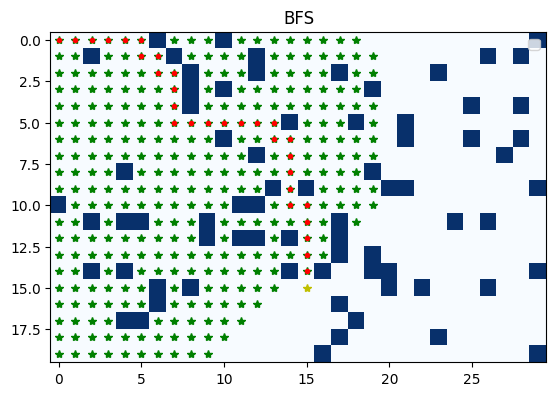 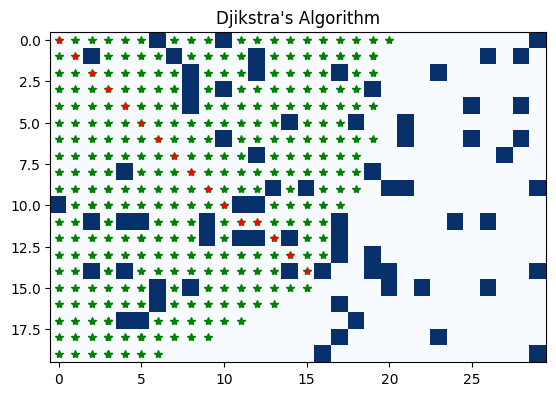 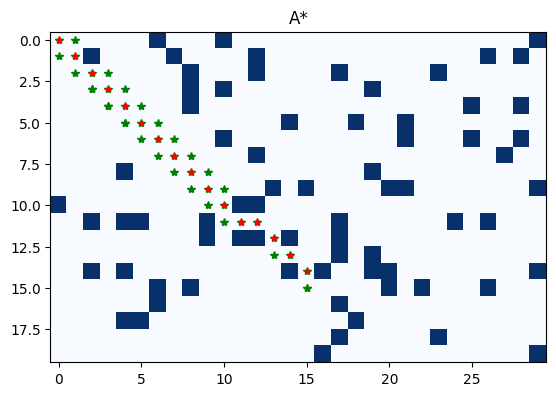

## Let's start with a robot in a 2D environment.

Say our robot can only move in a floor i.e. a two dimensional space and cannot just fly off in the third dimension. Obviously the floor is going to have a few obstacles. It means, there are some areas which the robot can explore(move to) and some areas that it cannot. It should be pretty obvious by now that for the robot to understand where to go and not to go, there must be a way to make the robot make sense of the answer to "where" question. 
> <b> How does a robot answer to "where" ? A human may answer by saying "I am standing near the door" and it may work well as an answer for another human who asked. But, for robots, that's not precise enough. Mathematics already teaches us a precise way to locate any point in 2D or 3D spaces. Yes, COORDINATES.</b>
<br><br>

The idea is to map out the whole floor into a grid such that we can denote any place on the floor using just two numbers $(x, y)$. Having our origin fixed at a certain known physical point on the floor and taking a small enough squares, we can get any resolution that we want.

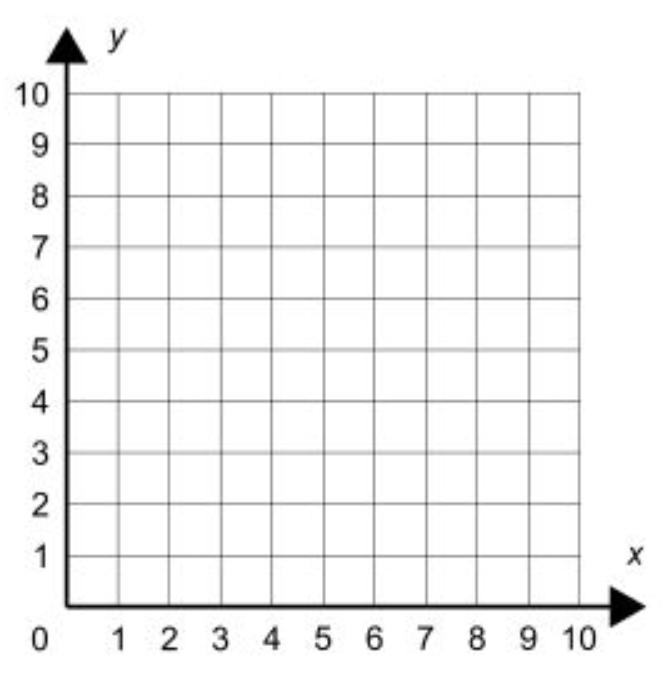

Once we have a grid, we need LOCALIZATION (details not discussed here) to actually tell where in this grid the robot is actually at the current time. Then we may want the robot to reach the destination point $(x_{\text{goal}}, y_{\text{goal}})$ while avoiding obstacles. Not just that, we may want the path to be as short as possible so that our robot can reach there quickly.

In computer science, this problem has been explored much earlier and there are a lot of algorithms actually that allow us to find the shortest path in this grid between any two points. Breadth First Search (BFS) is a very popular graph traversal algorithm. If we imagine our map or grid as a graph with nodes and edges, the problem can be solved using BFS.

At first, it may require some deep thinking to develop intuition as to understand how BFS is working and how even a grid can be imagined as structure such as a graph. So, let's try to understand grpah as a structure.

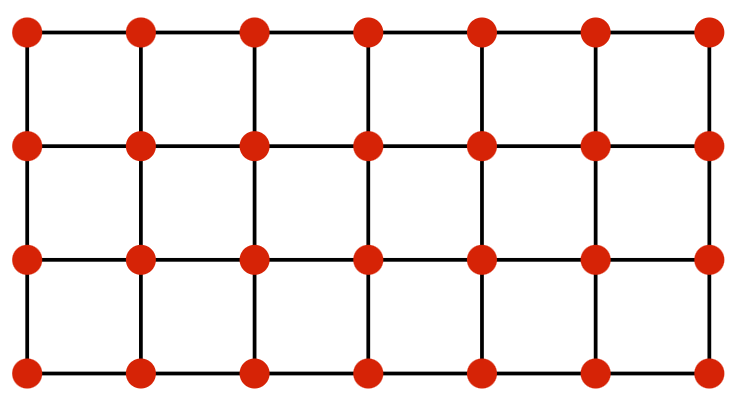

The picture above looks more like a graph and also somewhat like a grid isn't it ? Well, let's call it a grid-graph. In this grid-graph, each location is a red dot (called node) and each dot is connected to neighbouring nodes and that connection is called edges.

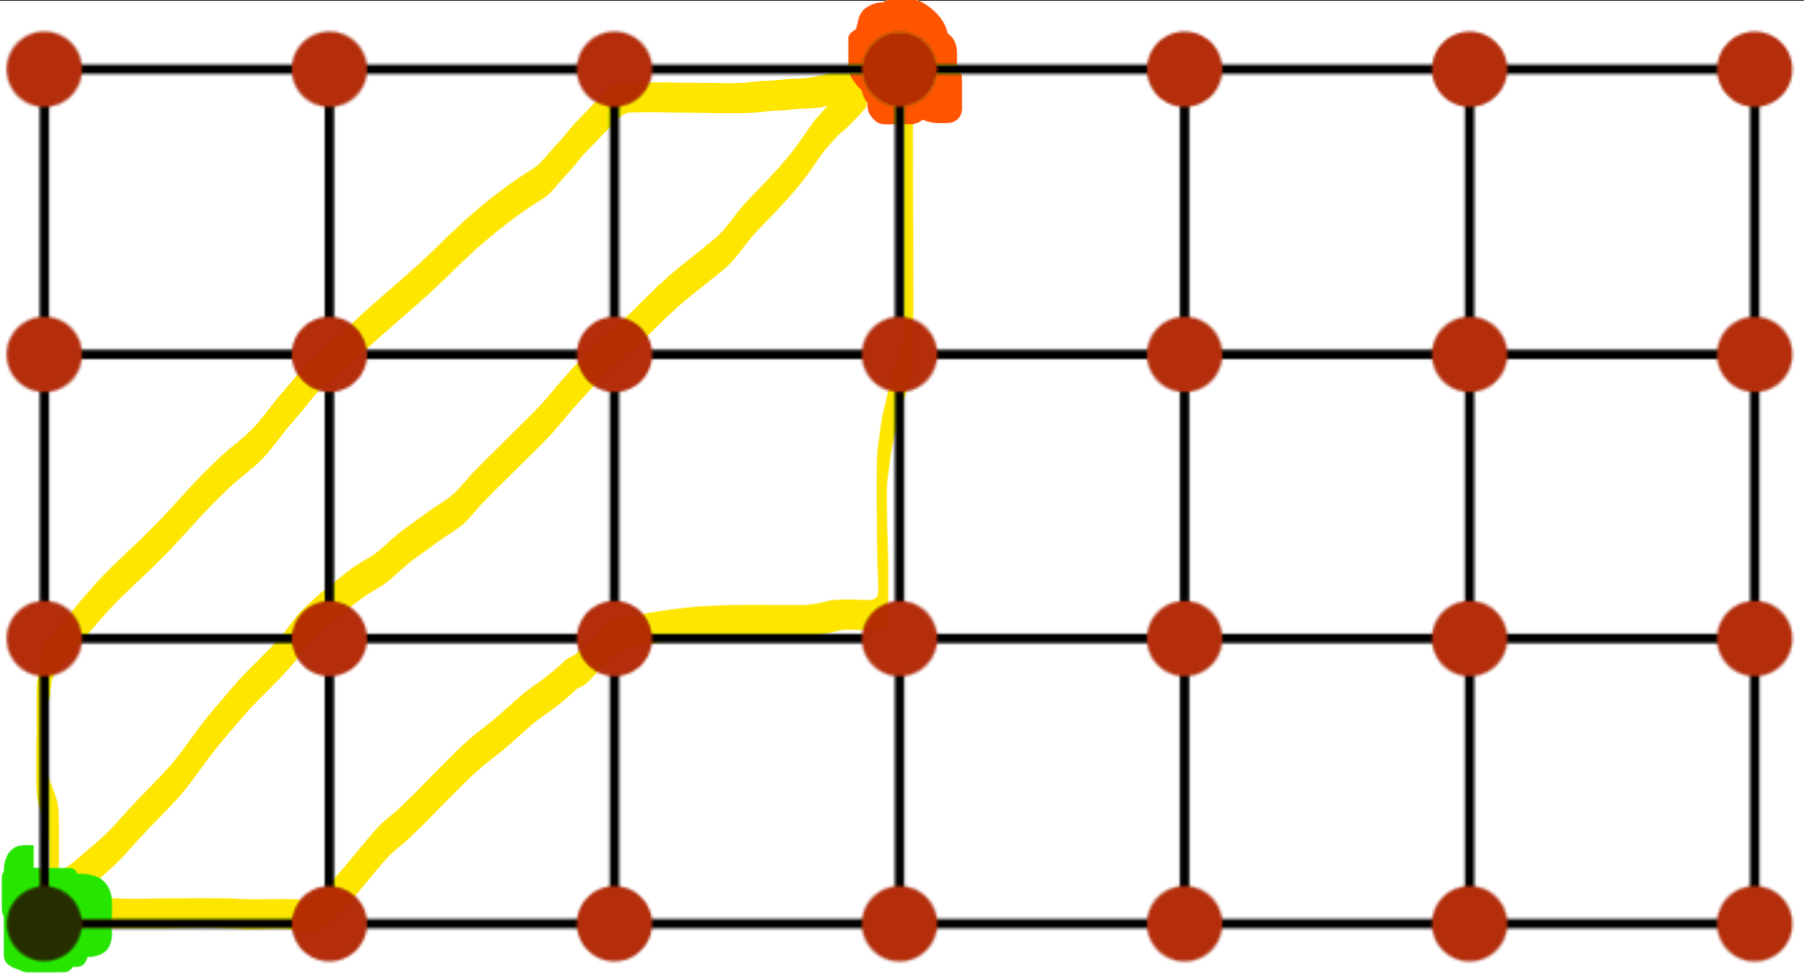

Imagine a number of ways we can traverse from green node to the orange node. The yellow lines form what we call as path from our start node to the goal node and there are a lot of options. BFS assumes that all the edges (including the diagonal ones) have the same weight. Weight in this case can be thought of as a factor that increases or decreases the time to travel along an edge. Here, BFS is an algorithm to try to connect the green dot with the orange dot using edges such that the number of edges is minimum. I am specifically using the term "number of edges" because since all edges have same weight, a path with least number of edges will be the fastest/shortest one.

## BFS Algorithm

Once we understand the algorithm of BFS clearly, we can then think of the appropriate data structures to implement the algorithm. The algorithm is pretty simple in its mechanism beacause, it's about starting from the 'start' node and exploring the directly connected neighbour nodes without repitition untill the 'goal' node is reached. So, we need a few supporting data structures to do a few things noted below :<br>
<ul>
    <li> A structure to store the map or graph so that nodes can be accessed easily. E.g. A matrix, A dictionary of nodes : edges, etc. </li>
    <li> A function to get the neighbor nodes as required </li>
    <li> An array to store the visited nodes </li>
    <li> A structure to store the parent nodes of explored nodes so as to form a path at the end of the algorithm</li>
</ul>
<br> I think one example is required to get an intuition of the structures that I am talking about. These are fundamentals and will be helpfu throughout our journey from BFS to A* and beyond. Example of above structures :

> 1. Say a map is $map = np.zeros((4, 7))$ which forms a $4 \times 7$ grid and each coordinate is a node.<br>
> 2. The values (all zeros in this case) doesn't matter because we are rather concerned with the identity of the node, best described by their location in the grid i.e. 
$(x, y)$, not it's value.<br>
> 3. We can use a tuple to uniquely identify each node in the grid, $(x, y)$
> 4. To begin exploring, we need neighbors, we can easily find all locations of surrounding nodes by advancing the indices by $(0, \pm 1)$ and $(\pm 1, 0)$.If we want to cover diagonally related nodes too, we can further modify indices using $(1, 1) \text{ and } (-1, -1)$<br>
> 5. We do need to be careful if we are trying to search for neighbors outside the map limits. <br>
<br>

We have a map, and a way to get neighbors of any node in the map.<br>

> 6. Maintaining two structures : let's call them "queue" and "visited", queue is where the next to explore nodes are appended, visited is a set actually which will record already explored nodes.

> 7. How to explore or visit a node ? A while loop to loop until the 'goal' node is not in the set 'visited'.

> 8. Where to begin ? Begin by exploring the 'start' node. Add 'start' in queue and visited in 'queue'.

> 9. Inside while loop, explore the neighbors of the first node stored in queue. (A queue works on first come first serve basis, that's the reason we are calling it a queue. Can be implemented using a python list)

> 10. For each neighbors, send all of them to the end of queue (append operation in python list), send the parent node to visited set, record all neighbors to be children of the parent node

The well-commented code below will elucidate the algorithm.

## BFS Implementation in python

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (1, 5), (1, 6), (2, 6), (2, 7), (3, 7), (4, 7), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (6, 13), (6, 14), (7, 14), (8, 14), (9, 14), (10, 14), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15)]


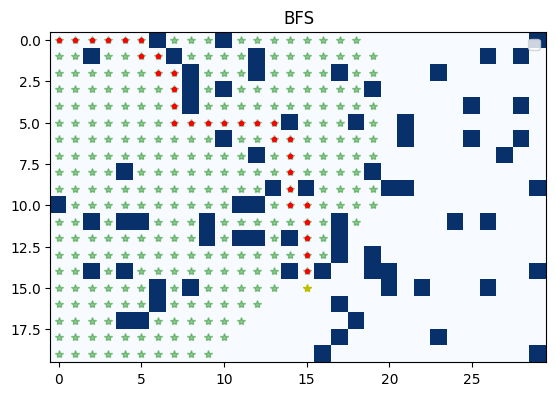

In [26]:
import numpy as np
import matplotlib.pyplot as plt

## Map
np.random.seed(42)
rows = 20
cols = 30
map = np.random.rand(rows, cols) < 0.1

"""
getNeighbors(u)

Input : u (A tuple containing (x, y) coordinates that uniquely identifies a node)

Output : neighbors (A list of tuples (x, y) coordinates of all the closest neighbors including diagonal neighbors)
"""
def getNeighbors(u):
  neighbors = []
  for delta in ((0, 1), (0, -1), (1, 0), (-1, 0)):
    cand = (u[0] + delta[0], u[1] + delta[1])

    if cand[0] >= 0 and cand[0] < len(map):
      if cand[1] >= 0 and cand[1] < len(map):
        if map[cand[0]][cand[1]] < 0.1:                               # Obstacle avoidance
          neighbors.append(cand)
  
  return neighbors


start = (0, 0)            # Assign a start node, can be different than origin
goal = (15, 15)             # Assign a goal or destination node

queue = [start]           # Create a queue structure using python list starting with start node
visited = {start}         # Create a visited set 
parent = {}               # Create a parent dictionary such that key is child and element is the parent node

# Visualization

plt.imshow(map, cmap = 'Blues')             
plt.plot(goal[1], goal[0], 'y*')

# Exploration begins

while goal not in visited:
    v = queue.pop(0)                 # select v to be first node in the queue, delete it from the queue
    plt.plot(v[1], v[0], 'g*', alpha = 0.4)    
    for u in getNeighbors(v):        # Check all neighbors of the current node
        if u not in visited:         # If the neighbor is not already visited
            queue.append(u)          # Add neighbor node at the end of queue, Exactly here, the neighbor node gets visited
            visited.add(u)           # Add neighbor node in visited
            parent[u] = v            # Record the parent node of the current neighbor node

# Path tracing

path = []                            # List to store path
key = goal                           # Start from goal backwards
while key in parent.keys():          # Go to all children nodes
    key = parent[key]                # Move upwards to explore the parent of parent
    path.insert(0, key)              # Add that parent of parent at the front of path

print(path)

# Visualizations 

for p in path:    
    plt.plot(p[1],p[0],'r.')

# plt.yticks(np.arange(0, rows, 1))
# plt.gca().invert_yaxis()
plt.title("BFS")
plt.legend()
plt.show()

As we can see the red stars to the goal from $(0, 0) \text{ to } (15, 15)$ as found out by BFS.<br>

Here, getNeighbors() function is helpful in one more thing, that is obstacle avoidance. For the coordinates which are not drivable for the robot, we can change the value of the particular pixel. Then we can filter those pixels during neighbors node exploration such that neighbors are only selected from nodes which do not contain obstacles.

## Djikstra's Algorithm

If you have noted that, we assumed that the cost of going to next node sideways is same as going to next node diagonally. This is obviously not true in reality since diagonal length is greater that side length of a square. It's good to observe that BFS is a heirarchial approach meaning that it gives greatest priority to the first generation of nodes, then to the second generation of nodes and so on. 
><b> Think about how the array 'queue' in above implementation gets filled, no node from second generation will be ahead in queue than the first generation. That is what is 'breadth-first' concept. </b>

But what if the node that connects to the current node using two edges is faster to travel than the node that connects directly using single edge ? Yes, it's not necessary that we model the edges to be uniform. Imagine a upward slope vs. a flat surface, gradients arise and they are to be encoded in the edge weights. We'll call this weight of an edge.

Djikstra's algorithm is one of the ways to find the fastest path in such cases where the cost of edges is different and we care about the total distance from the start to the goal node and not just the number of edges.

> <b> The main difference between BFS and Djikstra's is that in Djikstra's, we maintain the queue to be sorted according to the total distance from start node to that node. So, the neighbor node which has minimum total cost will be at front of the queue during exploration. </b>

### Djikstra's Algorithm Implementation in Python

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (11, 12), (12, 13), (13, 14), (14, 15)]


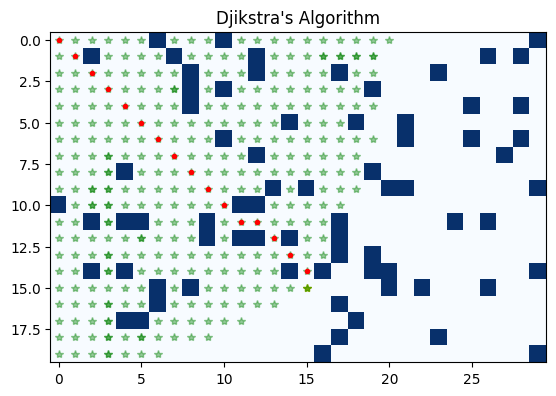

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heapify, heappop, heappush
from collections import defaultdict

np.random.seed(42)
## Map
rows = 20
cols = 30
map = np.random.rand(rows, cols) < 0.1          # Map with obstacels

def getNeighbors(u):
  neighbors = []
  cd = np.sqrt(2)

  for c, delta in ((1, (0, 1)), (1, (0, -1)), (1, (1, 0)), (1, (-1, 0)), (cd, (1, 1)), (cd, (1, -1)), (cd, (-1, 1)), (cd, (-1, -1))):
    cost, cand = (c, (u[0] + delta[0], u[1] + delta[1]))

    if cand[0] >= 0 and cand[0] < map.shape[0]:
      if cand[1] >= 0 and cand[1] < map.shape[1]:
        if map[cand[0]][cand[1]] < 0.1:
          neighbors.append((cost, cand))
  
  return neighbors


start = (0, 0)
goal = (15, 15)

queue = [(0, start)]
heapify(queue)

distances = defaultdict(lambda: float('inf'))

distances[start] = 0
visited = {start}
parent = {}

plt.imshow(map, cmap = 'Blues')
# plt.ion()                     
plt.plot(goal[1], goal[0], 'y*')

while goal not in visited:
    (currentdist, v) = heappop(queue)
    visited.add(v)
    plt.plot(v[1], v[0], 'g*', alpha = 0.4)
    # plt.show()
    # plt.pause(0.0000001)
    for (costvu, u) in getNeighbors(v):
        if u not in visited:
            newcost = distances[v] + costvu
            if newcost < distances[u]:
                distances[u] = newcost
                heappush(queue, (newcost, u))
                parent[u] = v

path = []
key = goal
while key in parent.keys():
    key = parent[key]
    path.insert(0, key)

print(path)

for p in path:    
    plt.plot(p[1],p[0],'r.')
# plt.ioff()
plt.title('Djikstra\'s Algorithm')
plt.show()

Changes in Djikstra's Algorithm from BFS:

>1. A node is represented by a tuple of cost and location : $node = (cost, (x, y))$ 
>2. queue is automatically sorted using $heapify$ function and other useful operations are $heappush$ and $heapop$, sorting happens according to value of $cost$ varibale
>3. a new dictionary called distances is maintained to store the latest total cost of a node, $total cost = cost(start, parent) + cost(parent, child)$ 
>4. 'current node not in visited' is insufficient to push any neighbor to queue, requires checking if new cost is less than the previous total cost

Everything else remains same.

> <b>Did you ask yourself, why not check the distance to goal node as well ? That's how A* was born.<br></b>
> <b> It's essentially about choosing the neighboring nodes. Yes, here we can. </b>

Well, it need not necessarily be distance to the goal but any heuristic to bias the search. The method is to select those neighbors to explore which have better chances of leading us towards the goal. We do that by adding another term during the cost calculation.

### A* Implementation in Python

[(0, 0), (1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7), (8, 8), (9, 9), (10, 10), (11, 11), (11, 12), (12, 13), (13, 14), (14, 15)]


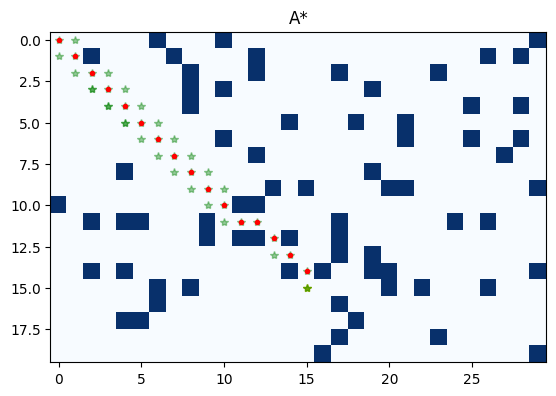

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from heapq import heapify, heappop, heappush
from collections import defaultdict

np.random.seed(42)

## Map
rows = 20
cols = 30
map = np.random.rand(rows, cols) < 0.1

def getNeighbors(u):
  neighbors = []
  cd = np.sqrt(2)

  for c, delta in ((1, (0, 1)), (1, (0, -1)), (1, (1, 0)), (1, (-1, 0)), (cd, (1, 1)), (cd, (1, -1)), (cd, (-1, 1)), (cd, (-1, -1))):
    cost, cand = (c, (u[0] + delta[0], u[1] + delta[1]))

    if cand[0] >= 0 and cand[0] < map.shape[0]:
      if cand[1] >= 0 and cand[1] < map.shape[1]:
        if map[cand[0]][cand[1]] < 1:
          neighbors.append((cost, cand))
          
  return neighbors


goal = (15, 15)
start = (0, 0)

queue = [(0, start)]
heapify(queue)

distances = defaultdict(lambda: float('inf'))

distances[start] = 0
visited = {start}
parent = {}

plt.imshow(map, cmap = 'Blues')
plt.ion()
plt.plot(goal[1], goal[0], 'y*')

while goal not in visited:
    (_, v) = heappop(queue)
    visited.add(v)
    plt.plot(v[1], v[0], 'g*', alpha = 0.4)
    # plt.show()
    # plt.pause(0.0000000001)
    for (costvu, u) in getNeighbors(v):
        if u not in visited:
            newcost =  distances[v] + costvu
            heuristic_cost = np.sqrt((goal[0] - u[0])**2 + (goal[1] - u[1])**2)
            if newcost < distances[u]:
                distances[u] = newcost 
                heappush(queue, (newcost + heuristic_cost, u))
                parent[u] = v

path = []
key = goal
while key in parent.keys():
    key = parent[key]
    path.insert(0, key)

np.save('planned_path', path)
print(path)

for p in path:    
    plt.plot(p[1],p[0],'r.')
# plt.ioff()
plt.title('A*')
plt.show()

Changes from Djikstra's to A* :
> 1. We introduce a term heuristic term and in this example, $heuristic\ \ cost = euclidean\_distance(neighbor, goal)$. This cost is added to previously calculated total cost while pushing a node to the queue.
> 2. Hence, we use this heuristic cost <u> only</u> while sorting the nodes in the queue. We <u>do not</u> update the distance of each node with heuristic cost. 

Scientists never stop improving the techniques. Someone thought, well this map is so big to search for and a lot of the map is not being used at all, why don't we sample the map and reduce the search space itself.

> ## <b>RRT is the whole new game.</b>

So called Rapidly exploring Random Trees is a method of reducing the search space itself before using search algorithms like A* to find the shortest path. In our case search space is the map, reducing the map means applying the search algorithm only on a sample space of the map that definitely contains start node, goal node and enough edges that go from start to goal.